In [1]:
import pandas as pd

df = pd.read_csv("epl_player_stats_24_25.csv")
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0


In [2]:
df.isnull().sum()

Player Name                  0
Club                         0
Nationality                  0
Position                     0
Appearances                  0
Minutes                      0
Goals                        0
Assists                      0
Shots                        0
Shots On Target              0
Conversion %                 0
Big Chances Missed           0
Hit Woodwork                 0
Offsides                     0
Touches                      0
Passes                       0
Successful Passes            0
Passes%                      0
Crosses                      0
Successful Crosses           0
Crosses %                    0
fThird Passes                0
Successful fThird Passes     0
fThird Passes %              0
Through Balls                0
Carries                      0
Progressive Carries          0
Carries Ended with Goal      0
Carries Ended with Assist    0
Carries Ended with Shot      0
Carries Ended with Chance    0
Possession Won               0
Disposse

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    object 
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 13  Offsides                   562 non-null    int64  

In [4]:
df.select_dtypes(exclude=["int64", "float64"])

,Player Name,Club,Nationality,Position,Conversion %,Passes%,Crosses %,fThird Passes %,gDuels %,aDuels %,Saves %
0,Ben White,Arsenal,England,DEF,13%,89%,20%,83%,50%,31%,0%
1,Bukayo Saka,Arsenal,England,MID,25%,87%,0%,60%,59%,51%,0%
2,David Raya,Arsenal,Spain,GKP,0%,0%,0%,0%,0%,0%,72%
3,Declan Rice,Arsenal,England,MID,15%,81%,11%,76%,35%,39%,0%
4,Ethan Nwaneri,Arsenal,England,MID,0%,0%,0%,0%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,0%,90%,39%,86%,48%,43%,0%
558,Tom King,Wolverhampton Wanderers,Wales,GKP,0%,0%,0%,0%,0%,0%,0%
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,0%,0%,0%,0%,0%,0%,0%
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,7%,78%,25%,70%,50%,19%,0%


In [ ]:
expected = df.groupby(by=["Squad"]).agg({
    "xG": "sum",
    "xAG": "sum",
}).reset_index().sort_values(by="xG", ascending=False)

top_15_expected = expected.iloc[: 15, : ][::-1]
top_15_expected.plot(kind="barh", x="Squad", y=["xAG", "xG"], legend=True, grid=True)
plt.show()

In [5]:
percentages = ["Conversion %", "Passes%", "Crosses %", "fThird Passes %", "gDuels %", "aDuels %", "Saves %"]
df_percentages = df[percentages].apply(lambda x: x.str.replace("%", "").astype("int64"))
df.drop(columns=percentages, inplace=True)
df = df.merge(df_percentages, left_index=True, right_index=True)

In [15]:
names = df["Player Name"]
positions = df["Position"]

X = df.drop(columns=["Player Name", 'Club', 'Nationality', "Position"])

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

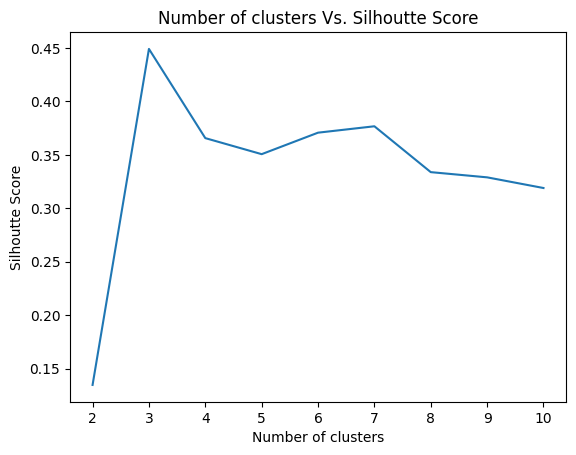

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    scores[k] = silhouette_score(X, kmeans.labels_)

plt.plot(list(scores.keys()), list(scores.values()))
plt.title("Number of clusters Vs. Silhoutte Score")
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Score")
plt.show()

In [22]:
kmeans = KMeans(4)
kmeans.fit_transform(X_scaled)

array([[11.61449844,  6.72765206,  7.14540149, 16.95955127],
       [ 9.45846128,  8.86235599,  6.52573066, 15.66117504],
       [14.28619811, 17.52406752, 15.56057836,  5.77868772],
       ...,
       [ 1.41337722, 11.16116529,  7.8131756 , 12.87307308],
       [13.79845005,  7.80738401,  8.64173844, 17.88052477],
       [ 2.33868515, 11.55054015,  8.17714855, 13.24333007]])

In [23]:
loadings = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

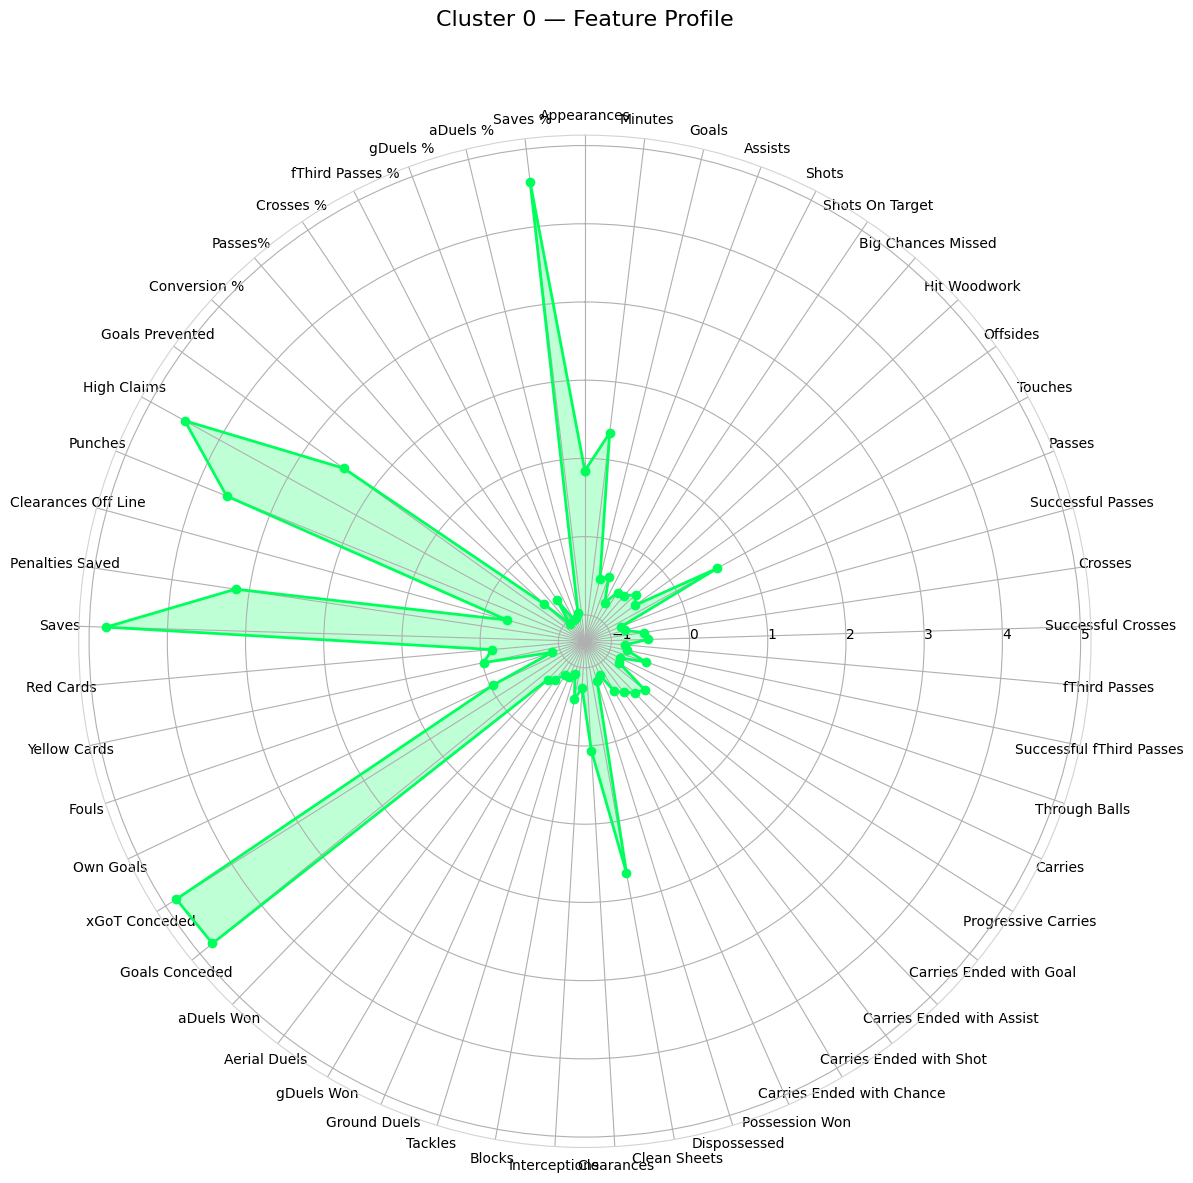

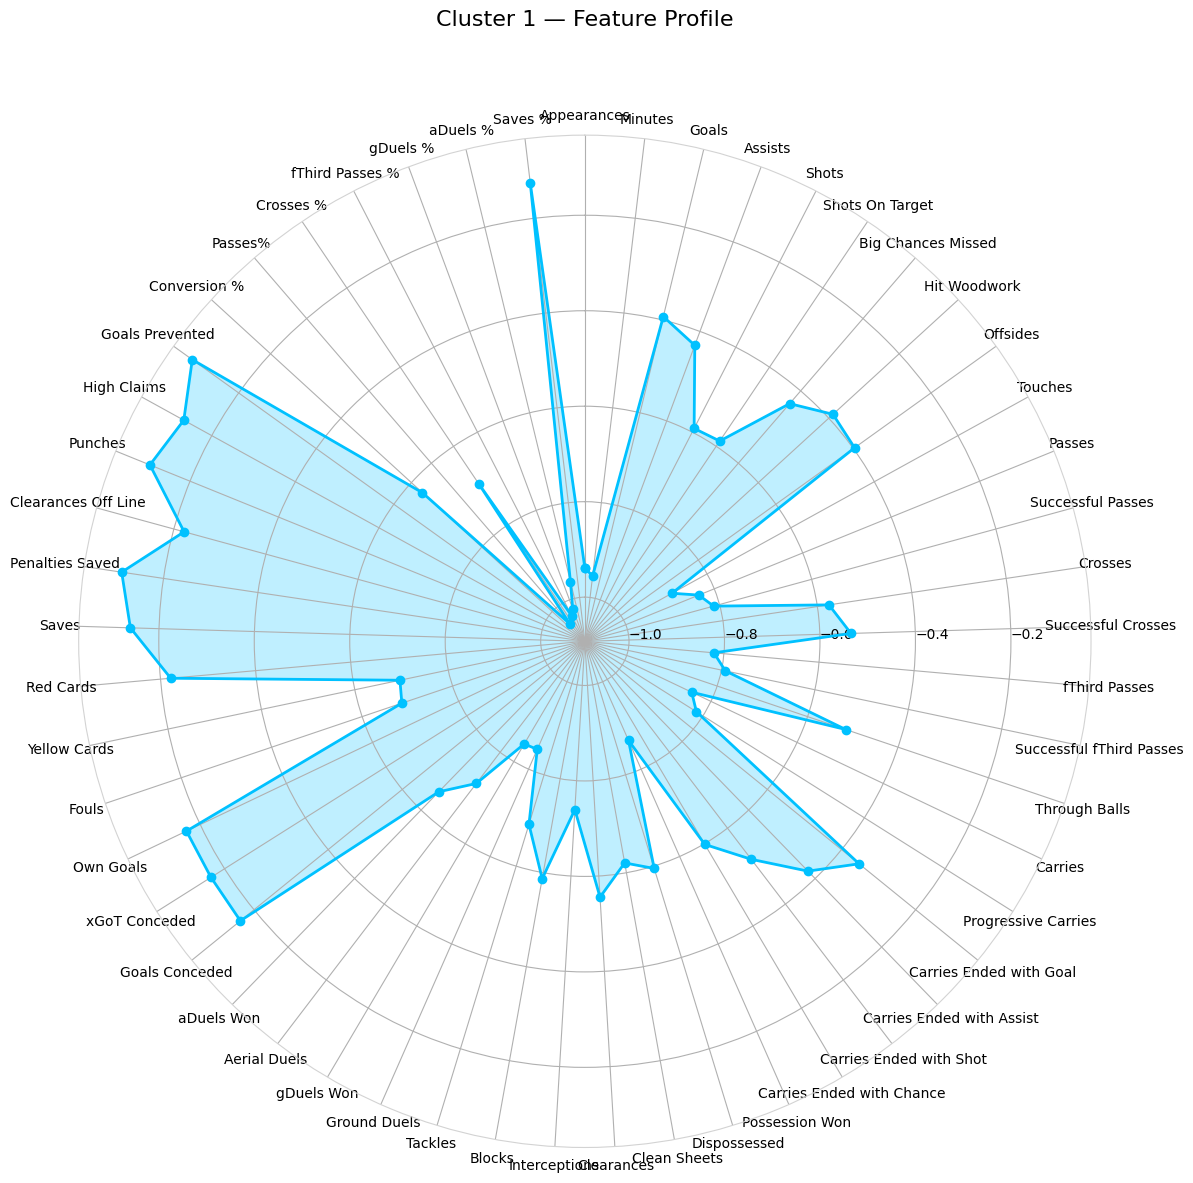

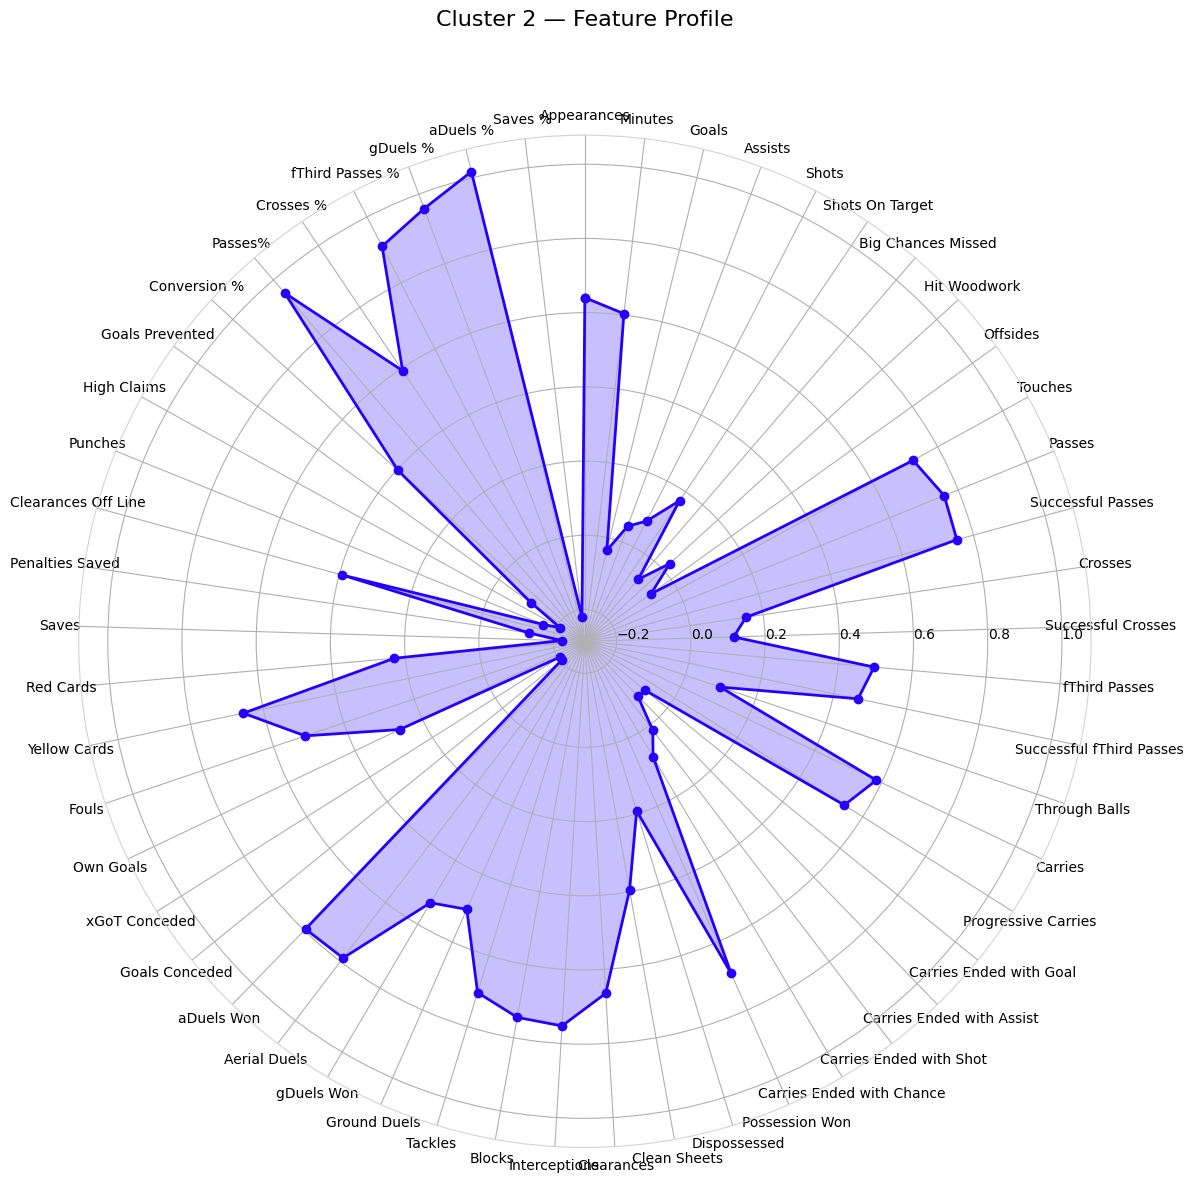

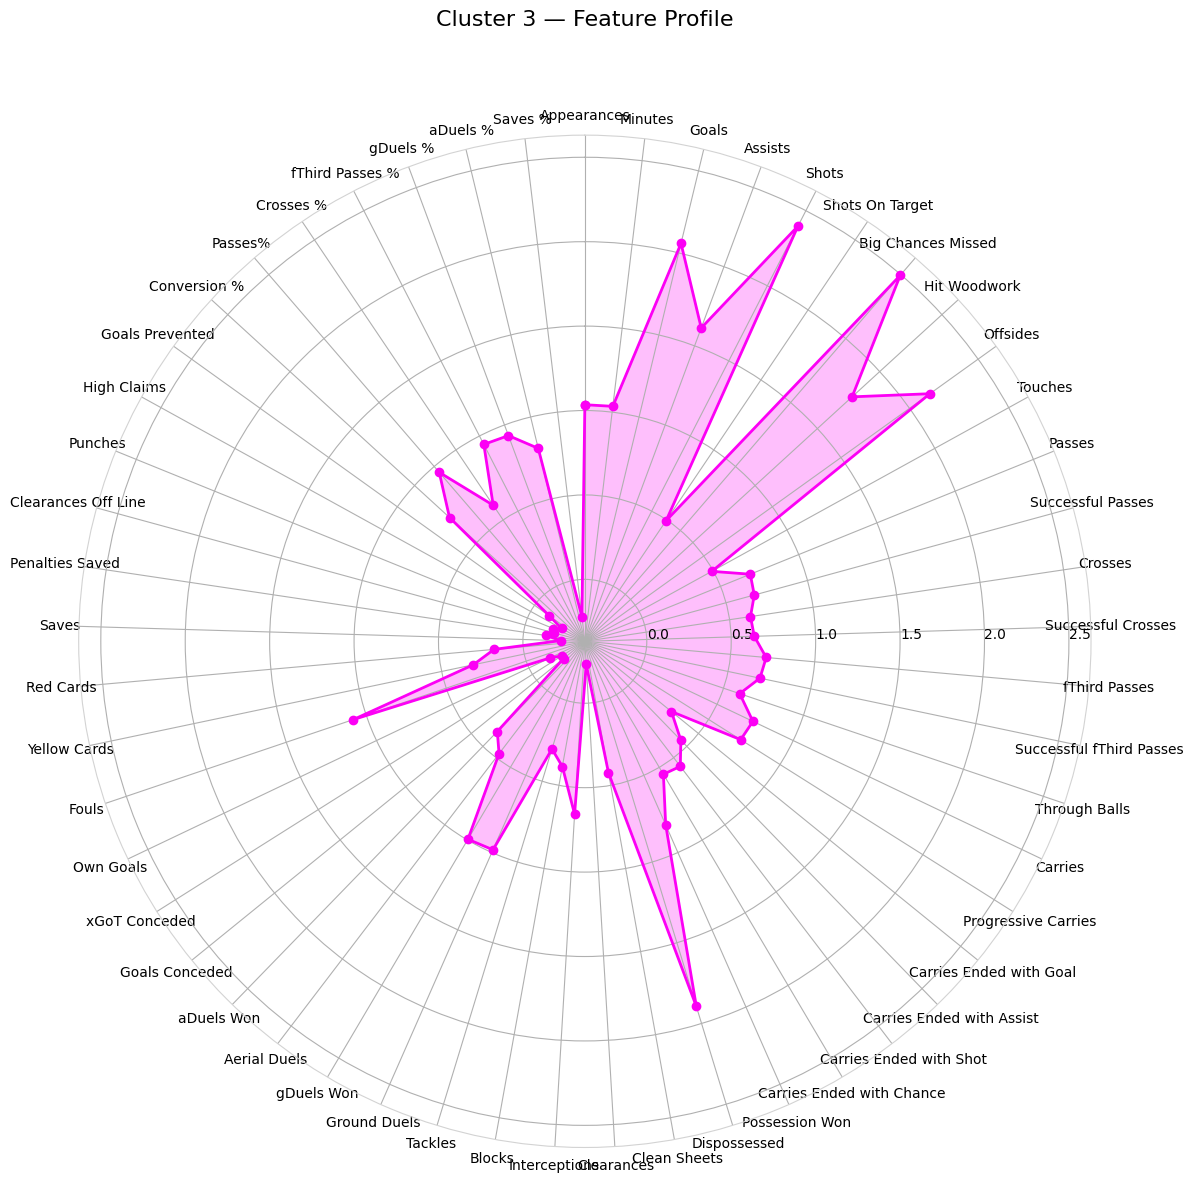

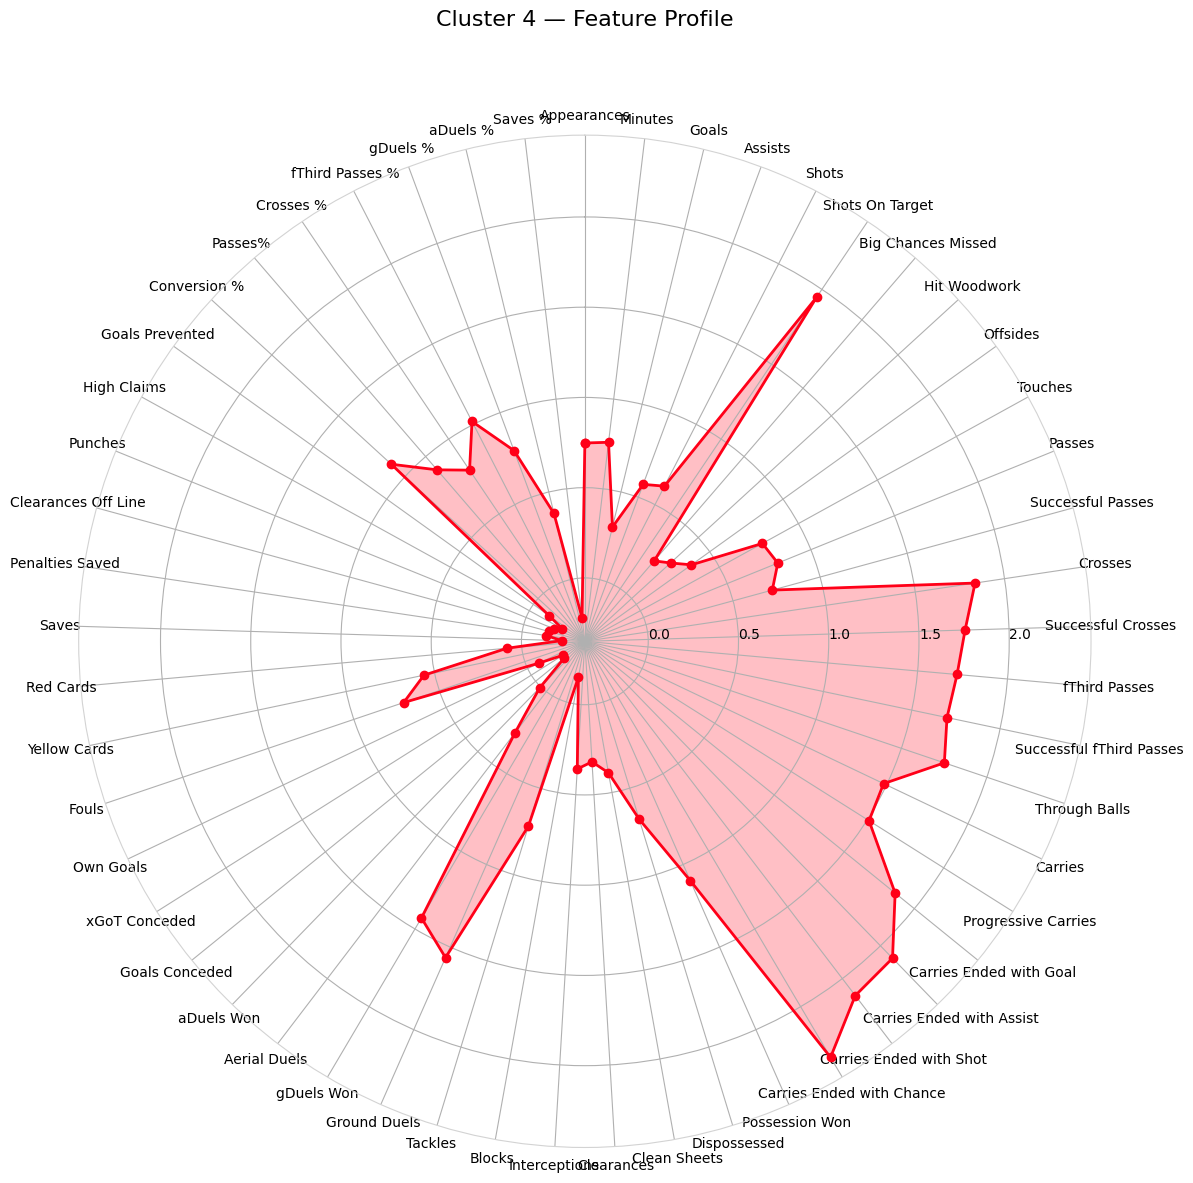

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as colormap

kmeans = KMeans(n_clusters=5, random_state=42)  
labels = kmeans.fit_predict(X_scaled)

X_labeled = pd.DataFrame(X_scaled, columns=X.columns)
X_labeled["Cluster"] = labels
cluster_means = X_labeled.groupby("Cluster").mean()

metrics = X.columns
N = len(metrics)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate([angles, [angles[0]]])  

color_palette = colormap.hsv(np.linspace(0.4, 1, len(cluster_means)))


for idx, (cluster_id, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += [values[0]]  

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
    
    ax.set_title(f"Cluster {cluster_id} — Feature Profile", y=1.1, fontsize=16)
    ax.set_theta_zero_location("N")
    ax.set_rlabel_position(90)
    ax.set_theta_direction(-1)
    ax.spines['polar'].set_color('lightgrey')

    ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o',
            color=color_palette[idx % len(color_palette)])
    
    ax.fill(angles, values, alpha=0.25, color=color_palette[idx % len(color_palette)])

    plt.xticks(angles[:-1], metrics, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


Here an experienced eye can make a few observations. Cluster 0 and 1 are goalkeepers. Cluster 1 includes those who have more time on the ball due to their skills or their team’s tactics. Cluster 2 represents defenders. Cluster 3 contains attackers. Cluster 4 groups midfielders.

In [61]:
kmeans.inertia_

13064.325851323709

In [64]:
kmeans

-13064.325851323709